In [19]:
import numpy as np

#TODO:
#https://share.cocalc.com/share/bb76377ee6823f7155a629e6f072f30d7c0b956f/Project_IsingModel/Project_IsingModel.ipynb?viewer=share
#http://micro.stanford.edu/~caiwei/me334/Chap12_Ising_Model_v04.pdf
# Put lattice in a class where data and indices-grid are there
#put everything in the class as methods
# For nearest neighbor queries on the indices-grid:
# https://docs.scikit-nano.org/dev/api/sknano.core.analysis.PeriodicKDTree.html

def rand_latt(shape, prob=0.5):
    nrows, ncols = shape
    latt = np.random.choice(a=[-1, 1], size=shape, p=[prob, 1-prob])
    return latt

normal_latt = lambda shape: np.ones(shape)

class ising_metropolis:
    def __init__(self, lattice, verbose=True):
        self.lattice = lattice
        self.verbose = verbose
        self.enforce_PBC()
    
    def enforce_PBC(self):
        #1 and 2d only, generalize to nd
        #https://flipdazed.github.io/blog/python/periodic-boundary-conditions
        nrows, ncols = self.lattice.shape
        if nrows != 1 and ncols != 1:
            self.lattice[nrows-1] = self.lattice[0]
            self.lattice[:,ncols -1] = self.lattice[:,0]
        elif nrows == 1:
            self.lattice[0, -1] = self.lattice[0, 0]
        elif ncols == 1:
            self.lattice[-1, 0] = self.lattice[0, 0]
            
    def rand_idx(self):
        #1 and 2d only. Generalize to nd
        nrows, ncols = self.lattice.shape
        indices =  (np.random.randint(0, high=nrows), np.random.randint(0, high=ncols))
        return indices
   
    def flip_spin(self, indices):
        self.lattice[indices] *= -1

    def comb_spinstate(self, indices):
        #Use: https://github.com/patvarilly/periodic_kdtree
        return None
    
    def draw(self, plotter, draw_size=(25,1), draw_aspect='equal'):
        #1 and 2d only. put error for more ds
        l, w = draw_size
        fig = plt.figure()
        fig.set_size_inches(l,w)
        plotter.axis('off')
        plotter.imshow(self.lattice, cmap='cool',interpolation='nearest',aspect=draw_aspect)
        plotter.show()
    
    def evolve(self):
        return None

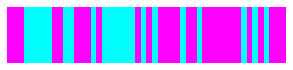

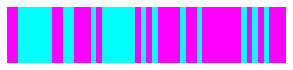

In [20]:
#Test values for rendering ising model in 1d 
import matplotlib.pyplot as plt
%matplotlib inline
# 1 dimensional
nspins = 50
image_size = (5, 20) #This is in inches
image_aspect = 10 #Adjust this with nspins
I_1d = ising_metropolis(rand_latt((1, nspins)))

I_1d.draw(plt, draw_size=image_size, draw_aspect=image_aspect)

I_1d.flip_spin(I_1d.rand_idx())

I_1d.draw(plt, draw_size=image_size, draw_aspect=image_aspect)

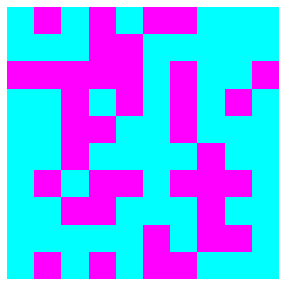

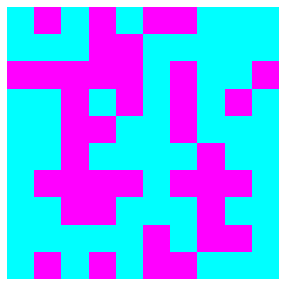

In [22]:
#Test values for rendering ising model in 2d 

# 2 dimensional
spinshape = (10, 10)
image_size = (5, 5) #This is in inches
image_aspect = 1 #Adjust this with nspins

I_2d = ising_metropolis(rand_latt(spinshape))

I_2d.draw(plt, draw_size=image_size, draw_aspect=image_aspect)

I_2d.flip_spin(I_2d.rand_idx())

I_2d.draw(plt, draw_size=image_size, draw_aspect=image_aspect)